
Mapas Auto-Organizáveis (SOM)

Neste trabalho, será utilizada a mesma base de dados do trabalho anterior: o dataset de predição de diabetes disponível no Kaggle (https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset). Este dataset foi escolhido por conter atributos clínicos relevantes e por representar um problema real de classificação binária.


In [ ]:
!pip install minisom

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
from minisom import MiniSom
from collections import defaultdict

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.5-py3-none-any.whl size=12031 sha256=0e04fd0de6384698edd631ca25ad608d1b53fc3b10b6062a079eed6e4cd187da
  Stored in directory: /root/.cache/pip/wheels/19/db/95/5e53bc2b88a328217fdf9f2886cafbe86b0df274f4b601f572
Successfully built minisom


In [ ]:
df = pd.read_csv("diabetes_prediction_dataset.csv")
df.head()


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
df.isna().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


In [ ]:
df_encoded = pd.get_dummies(df, columns=['gender', 'smoking_history'])

X = df_encoded.drop('diabetes', axis=1).values
y = df_encoded['diabetes'].values

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
df_encoded

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,0,True,False,False,False,False,False,False,True,False
1,54.0,0,0,27.32,6.6,80,0,True,False,False,True,False,False,False,False,False
2,28.0,0,0,27.32,5.7,158,0,False,True,False,False,False,False,False,True,False
3,36.0,0,0,23.45,5.0,155,0,True,False,False,False,True,False,False,False,False
4,76.0,1,1,20.14,4.8,155,0,False,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,80.0,0,0,27.32,6.2,90,0,True,False,False,True,False,False,False,False,False
99996,2.0,0,0,17.37,6.5,100,0,True,False,False,True,False,False,False,False,False
99997,66.0,0,0,27.83,5.7,155,0,False,True,False,False,False,False,True,False,False
99998,24.0,0,0,35.42,4.0,100,0,True,False,False,False,False,False,False,True,False



## 2️⃣ Treinamento e Configuração do SOM

Aqui configuramos os hiperparâmetros do SOM, como tamanho da grade, taxa de aprendizado e sigma. A biblioteca `MiniSom` será utilizada.


In [ ]:
som_x, som_y = 50, 50            # Tamanho da grade do mapa (ajustável conforme a complexidade dos dados)
sigma = 6.0                   # Alcance da vizinhança (↑ mais global, ↓ mais local)
learning_rate = 1           # Taxa de aprendizado (↑ mais rápido, ↓ mais estável no final)
num_epochs = 1000            # Número de iterações de treinamento (maior = mais refinado)

som = MiniSom(som_x, som_y, input_len=X_scaled.shape[1],
              sigma=sigma, learning_rate=learning_rate)
som.random_weights_init(X_scaled)
som.train(X_scaled, num_epochs)

som.random_weights_init(X_scaled)
som.train_random(data=X_scaled, num_iteration=1000)


## 3️⃣ Avaliação e Visualização

A seguir, apresentamos as métricas Topographic Error, Quantization Error, U-Matrix, Hit Map e Component Planes.


Calcular o erro

In [ ]:
te = som.topographic_error(X_scaled)
te
print(f'Topographic Error: {te:.4f}')

Topographic Error: 0.0260


In [ ]:
qe = som.quantization_error(X_scaled)
print(f'Quantization Error: {qe:.4f}')


Quantization Error: 0.2189


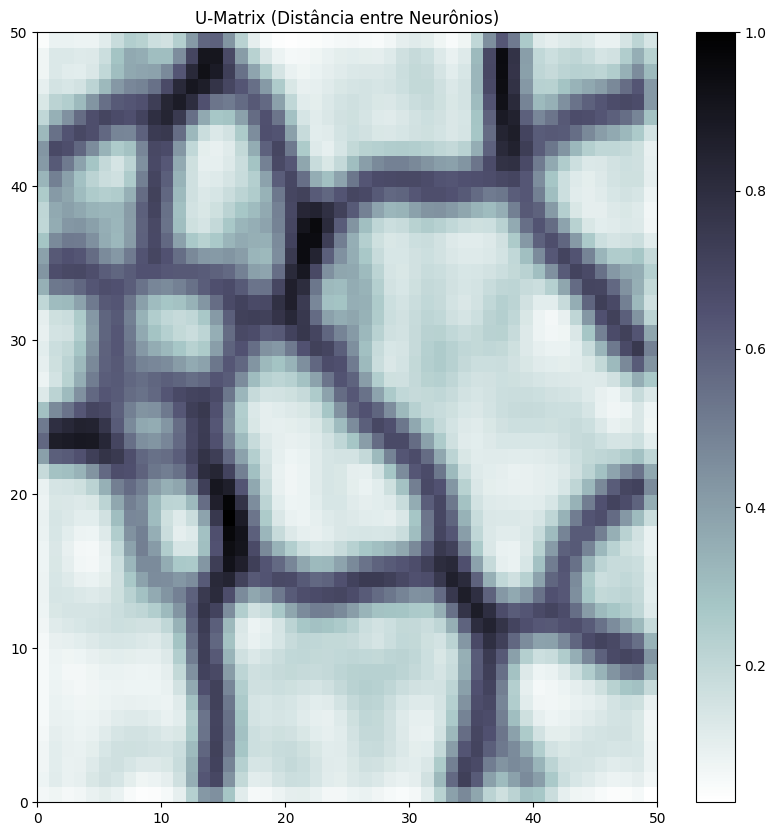

In [ ]:
plt.figure(figsize=(10, 10))
plt.pcolor(som.distance_map().T, cmap='bone_r')
plt.colorbar()
plt.title('U-Matrix (Distância entre Neurônios)')
plt.show()


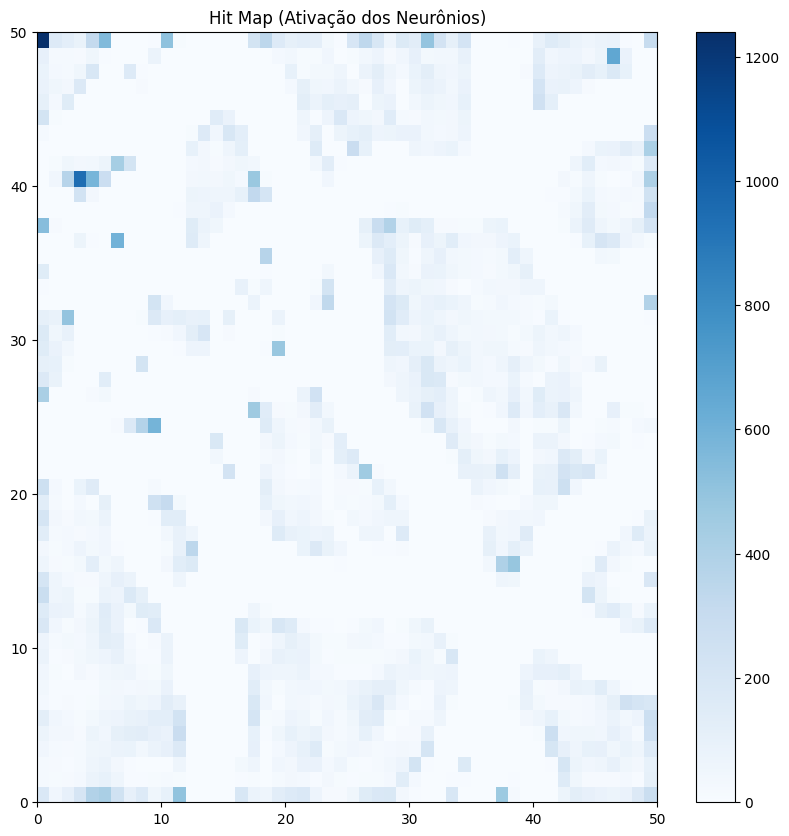

In [ ]:
hits = som.activation_response(X_scaled)
plt.figure(figsize=(10, 10))
plt.pcolor(hits.T, cmap='Blues')
plt.colorbar()
plt.title('Hit Map (Ativação dos Neurônios)')
plt.show()


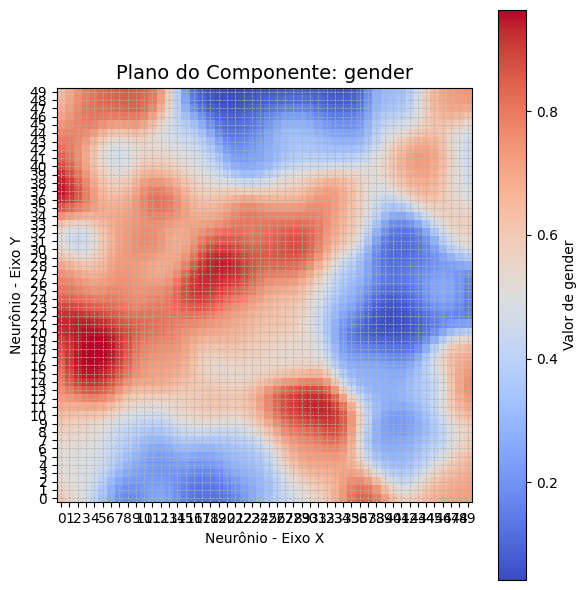

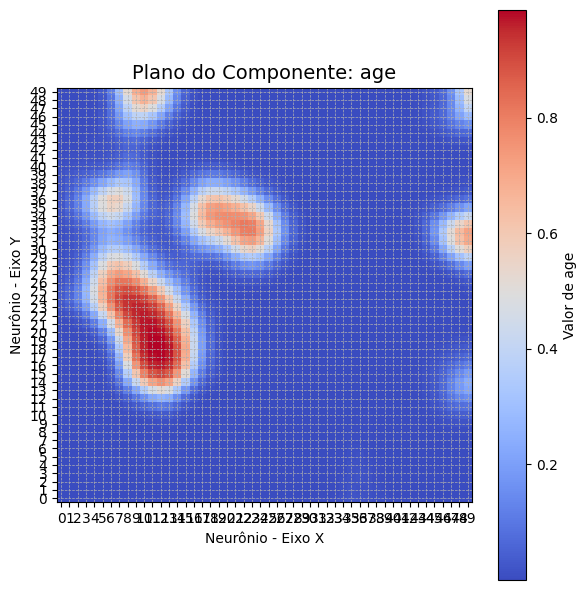

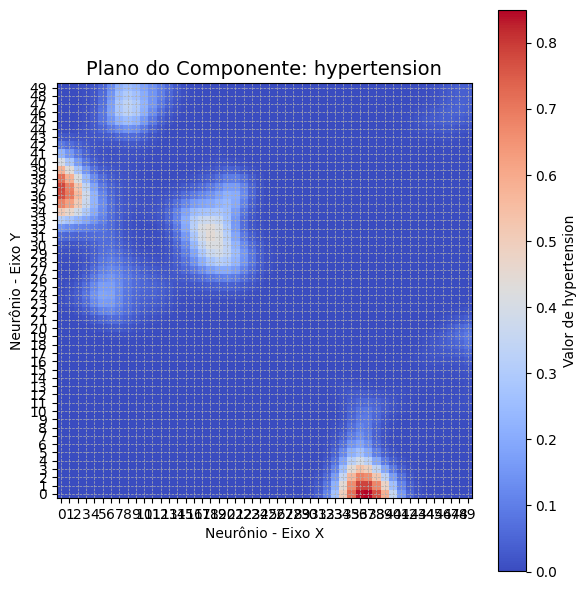

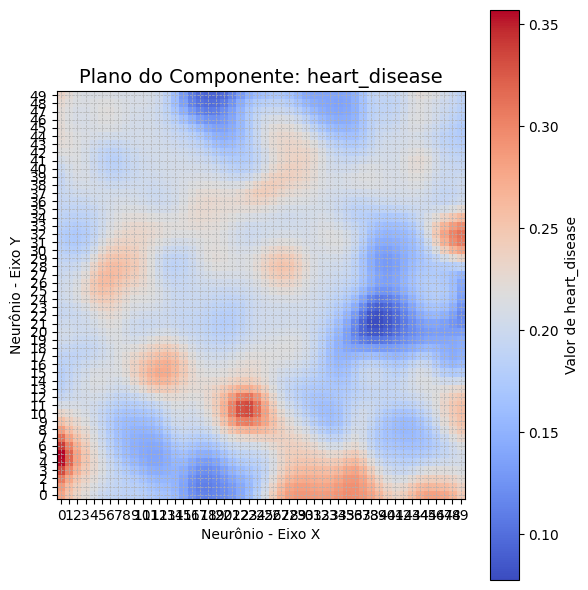

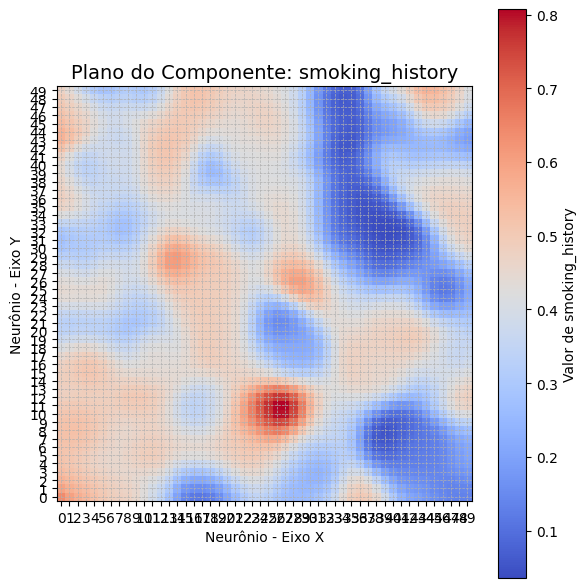

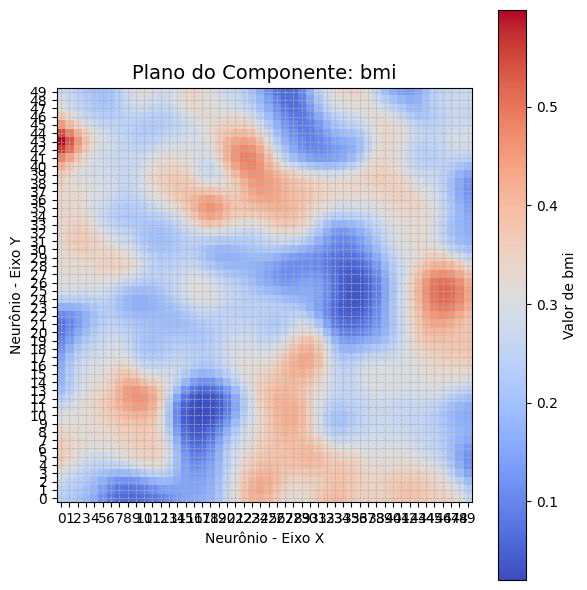

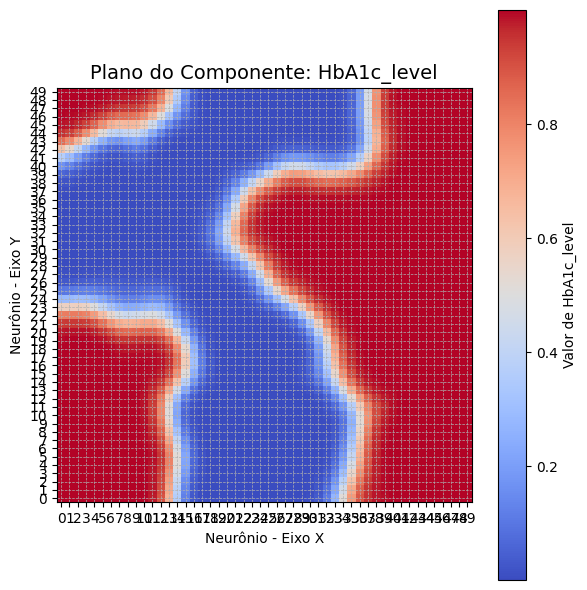

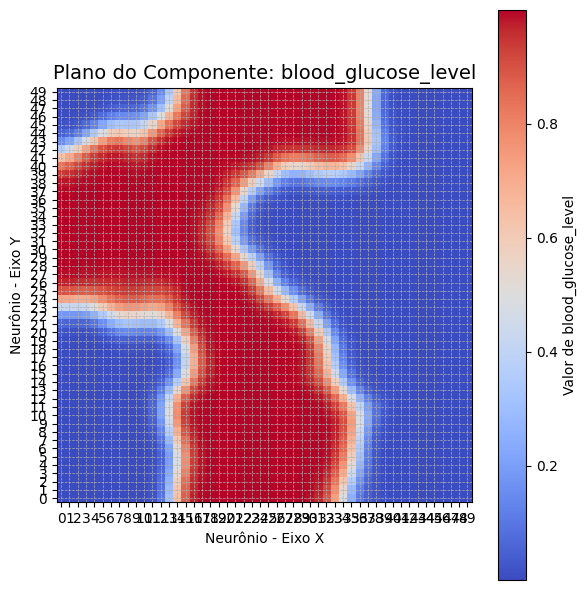

In [ ]:
weights = som.get_weights()

for i, col in enumerate(df.columns[:-1]):
    plt.figure(figsize=(6, 6))
    plt.title(f'Plano do Componente: {col}', fontsize=14)
    plt.imshow(weights[:, :, i].T, cmap='coolwarm', origin='lower')
    plt.colorbar(label=f'Valor de {col}')
    plt.xlabel('Neurônio - Eixo X')
    plt.ylabel('Neurônio - Eixo Y')
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.xticks(np.arange(weights.shape[0]))
    plt.yticks(np.arange(weights.shape[1]))
    plt.tight_layout()
    plt.show()



## 4️⃣ Análise e Interpretação dos Resultados

Agora analisamos os agrupamentos, observando a coerência com a variável alvo (diabetes).


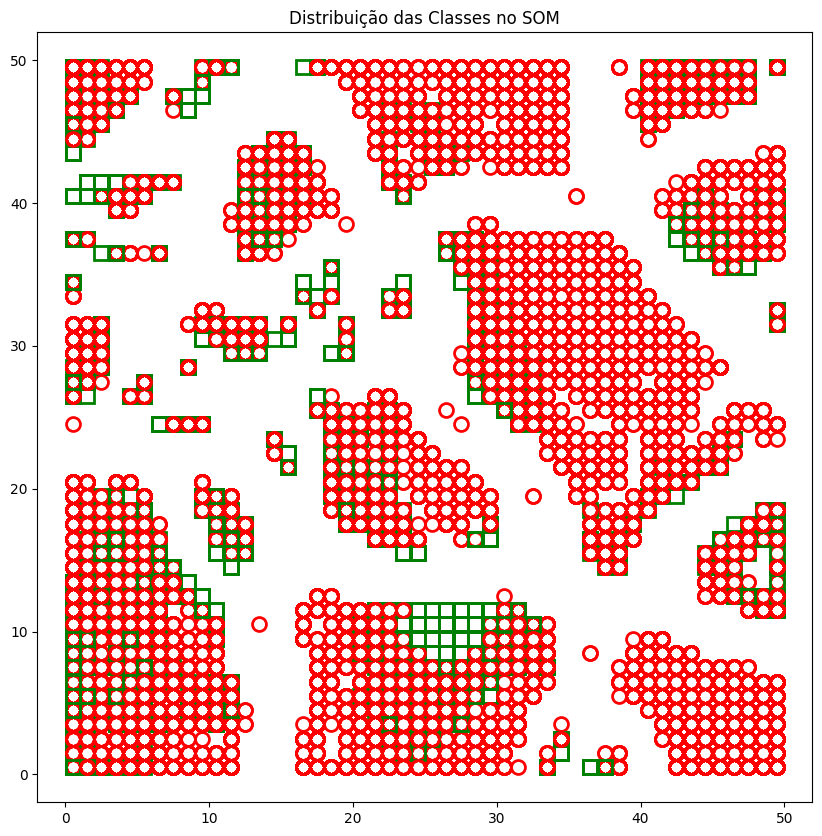

In [ ]:
markers = ['o', 's']
colors = ['r', 'g']

plt.figure(figsize=(10, 10))
for i, x in enumerate(X_scaled):
    w = som.winner(x)
    plt.plot(w[0]+0.5, w[1]+0.5, markers[y[i]],
             markerfacecolor='None',
             markeredgecolor=colors[y[i]],
             markersize=10, markeredgewidth=2)
plt.title("Distribuição das Classes no SOM")
plt.show()



## Comparação com o Trabalho Anterior (MLP)

- O SOM permite visualizar padrões topológicos, enquanto o MLP realiza predições diretas.
- Agrupamentos distintos no SOM reforçam a separabilidade entre indivíduos com e sem diabetes.
- O SOM é útil para análise exploratória; o MLP é mais apropriado para tomada de decisão automática.
